In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
import statsmodels.api as sm
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

from matplotlib import rcParams

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

In [5]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [6]:
boston.data.shape

(506, 13)

In [7]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [8]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
bos = pd.DataFrame(boston.data)
bos.head()

0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33

In [10]:
bos.columns = boston.feature_names
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [11]:
print(boston.target.shape)

(506,)


In [12]:
bos['PRICE'] = boston.target
bos.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [13]:
bos.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.647423   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

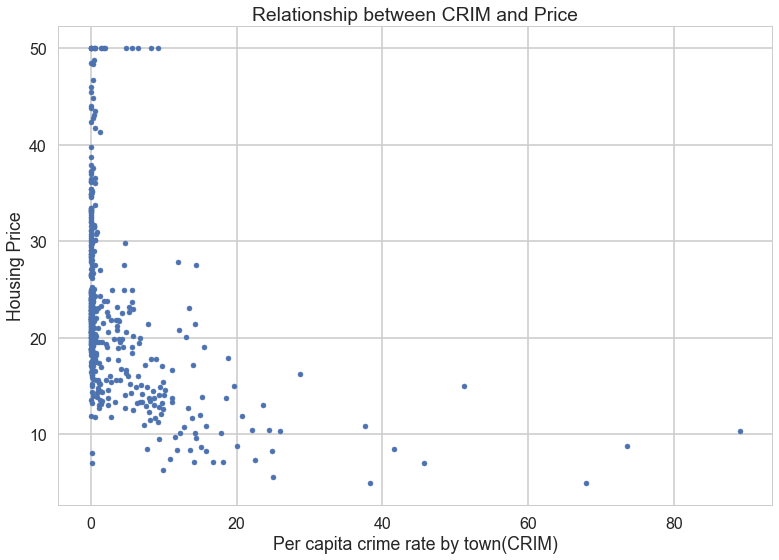

In [20]:
plt.scatter(bos.CRIM,bos.PRICE,s=25)
plt.xlabel("Per capita crime rate by town(CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

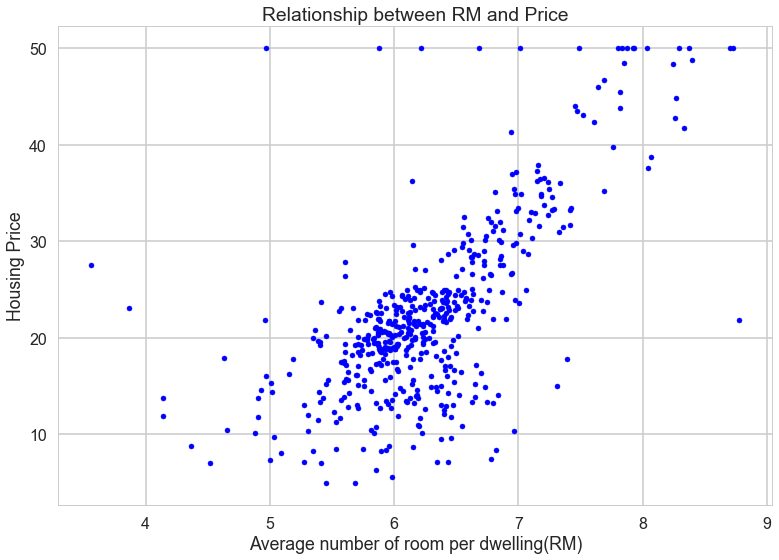

In [22]:
plt.scatter(bos.RM,bos.PRICE,s=25,c='b')
plt.xlabel("Average number of room per dwelling(RM)")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

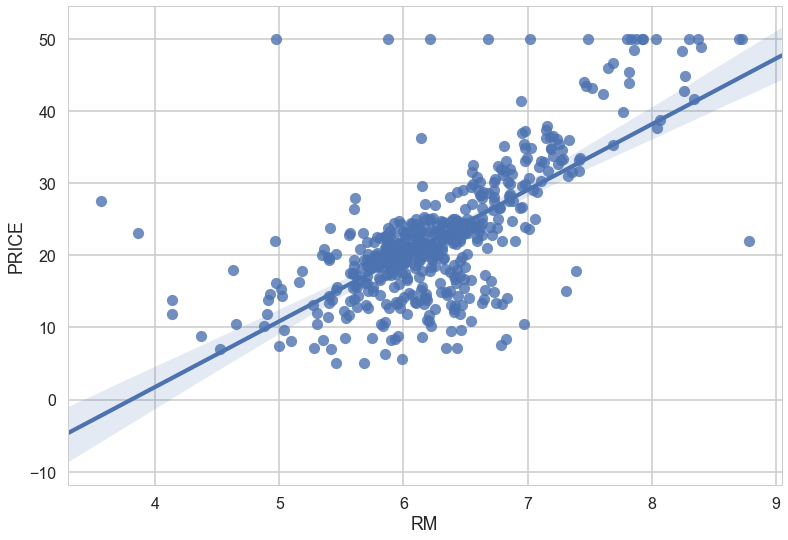

In [26]:
sns.regplot(x='RM',y='PRICE',data=bos,fit_reg=True)

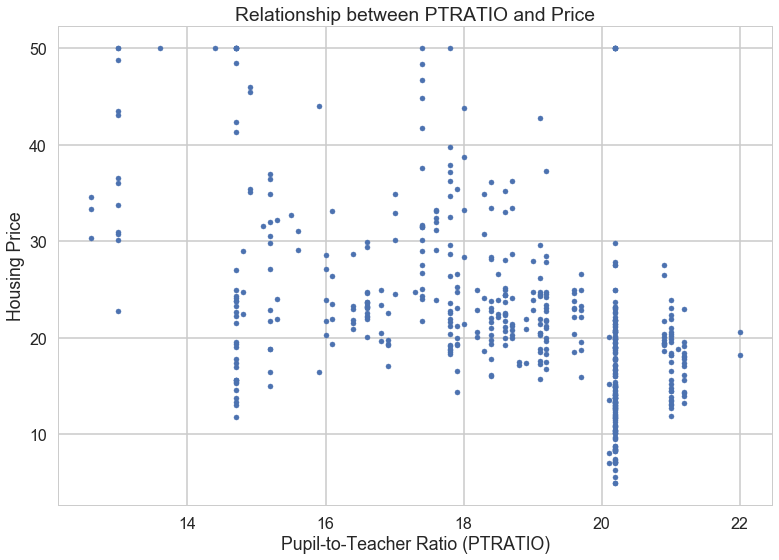

In [28]:
plt.scatter(bos.PTRATIO, bos.PRICE,s=25)
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

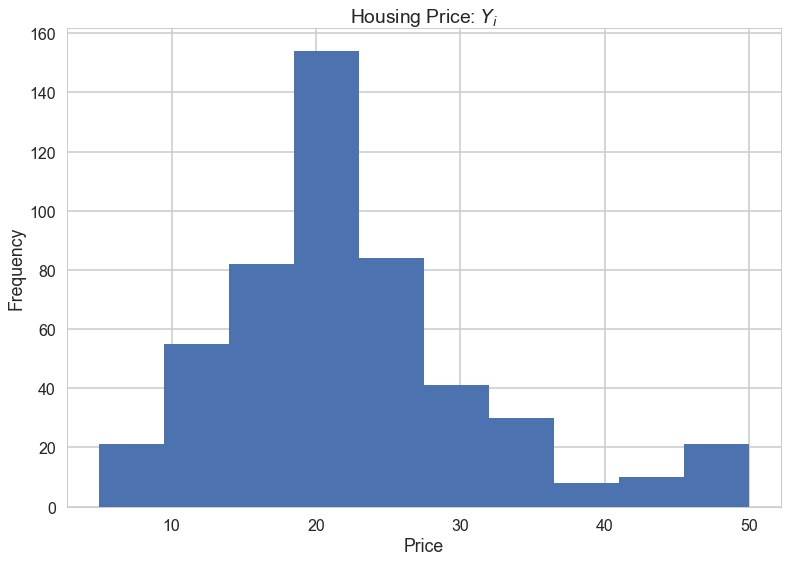

In [29]:
plt.hist(bos.PRICE)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Housing Price: $Y_i$")

In [30]:
from sklearn.linear_model import LinearRegression
x = bos.drop('PRICE', axis = 1)

lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
lm.fit(x,bos.PRICE)
print('Number of coefficients:', len(lm.coef_))
print("Estimated coefficients: ",lm.coef_)
print('Estimated intercept coefficient:', lm.intercept_)

Number of coefficients: 13
Estimated coefficients:  [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
Estimated intercept coefficient: 36.4911032804


In [42]:
#zip now returns an iterator in python 3, not a list.
pd.DataFrame(list(zip(x.columns, lm.coef_)), columns = ['features', 'estimatedCoefficients'])

features  estimatedCoefficients
0      CRIM              -0.107171
1        ZN               0.046395
2     INDUS               0.020860
3      CHAS               2.688561
4       NOX             -17.795759
5        RM               3.804752
6       AGE               0.000751
7       DIS              -1.475759
8       RAD               0.305655
9       TAX              -0.012329
10  PTRATIO              -0.953464
11        B               0.009393
12    LSTAT              -0.525467

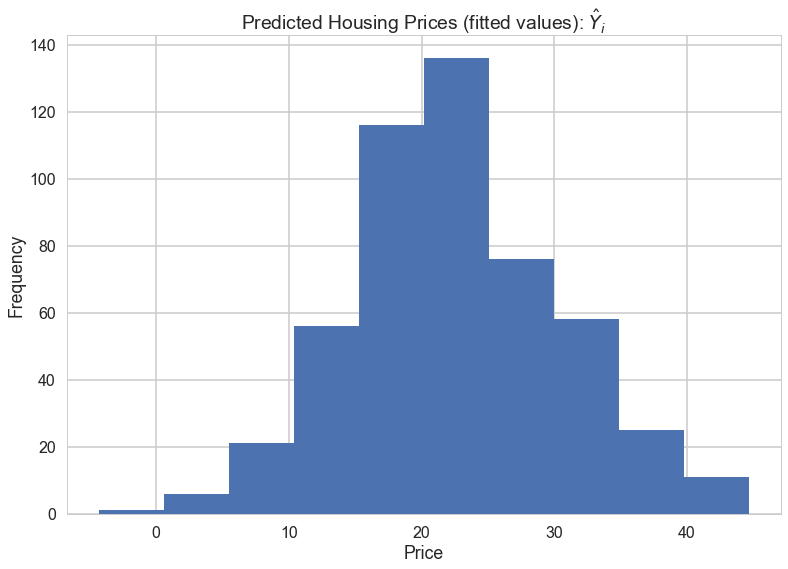

In [35]:
lm.predict(x)[:5]
plt.hist(lm.predict(x))
plt.title('Predicted Housing Prices (fitted values): $\hat{Y}_i$')
plt.xlabel('Price')
plt.ylabel('Frequency')

In [46]:
print("residual sum of squares: ",np.sum((bos.PRICE - lm.predict(x))**2))

residual sum of squares:  11080.276284149872


In [47]:
print("Mean squared error: ",np.mean((bos.PRICE - lm.predict(x))**2))

Mean squared error:  21.897779217687493


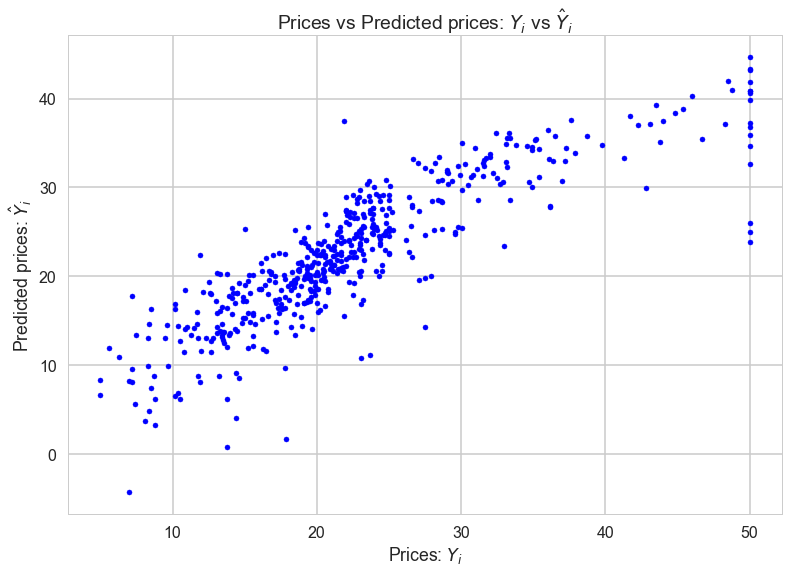

In [48]:
plt.scatter(bos.PRICE,lm.predict(x),s=25,c='b')
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")

In [49]:
lm = LinearRegression()
lm.fit(x[['PTRATIO']],bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(x[['PTRATIO']]))**2)
print(msePTRATIO)

62.65220001376927


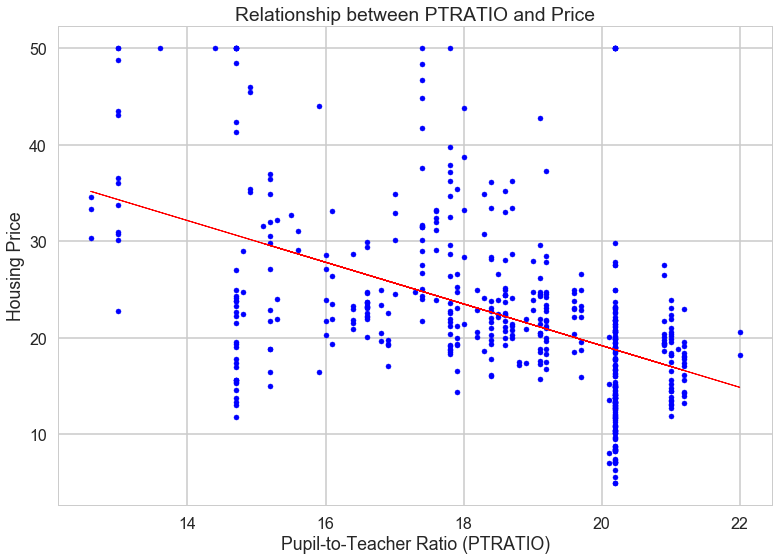

In [55]:
plt.scatter(bos.PTRATIO,bos.PRICE,s=25,c='b')
plt.xlabel("Pupil-to-Teacher Ratio (PTRATIO)")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

plt.plot(bos.PTRATIO, lm.predict(x[['PTRATIO']]),c='r',lw=1)
plt.show()


## Other important things to think about when fitting a linear regression model
***
<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. </li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X.  
        <ul>
            <li>e.g. PTRATIO
        </ul>
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. 
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

In [65]:
#r = bos[['CRIM','RM','PTRATIO']]

lm.fit(x[['CRIM','RM','PTRATIO']],bos.PRICE)
print("Mean standard error: ",np.mean((bos.PRICE - lm.predict(x[['CRIM','RM','PTRATIO']]))**2))

Mean standard error:  34.32379656468121


In [68]:
x_train = x[:-50]
x_test = x[-50:]
y_train = bos.PRICE[:-50]
y_test = bos.PRICE[-50:]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(456, 13)
(50, 13)
(456,)
(50,)


In [72]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,bos.PRICE,test_size=0.10,random_state=5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 13)
(51, 13)
(455,)
(51,)


In [73]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train = lm.predict(x_train)
pred_test = lm.predict(x_test)

In [74]:
print("Fit a model X_train, and calculate MSE with Y_train:",np.mean((y_train - lm.predict(x_train))**2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:",np.mean((y_test - lm.predict(x_test))**2))

Fit a model X_train, and calculate MSE with Y_train: 21.842485657450794
Fit a model X_train, and calculate MSE with X_test, Y_test: 24.915652302755205


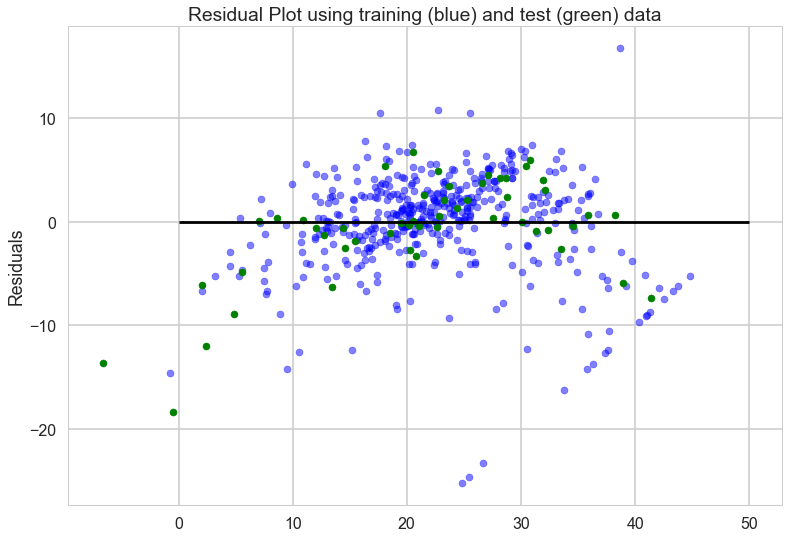

In [76]:
plt.scatter(lm.predict(x_train),lm.predict(x_train) - y_train,c='b',s=50,alpha=0.5)
plt.scatter(lm.predict(x_test),lm.predict(x_test) - y_test,c='g',s=50)
plt.hlines(y = 0, xmin=0, xmax = 50)
plt.title('Residual Plot using training (blue) and test (green) data')
plt.ylabel('Residuals')

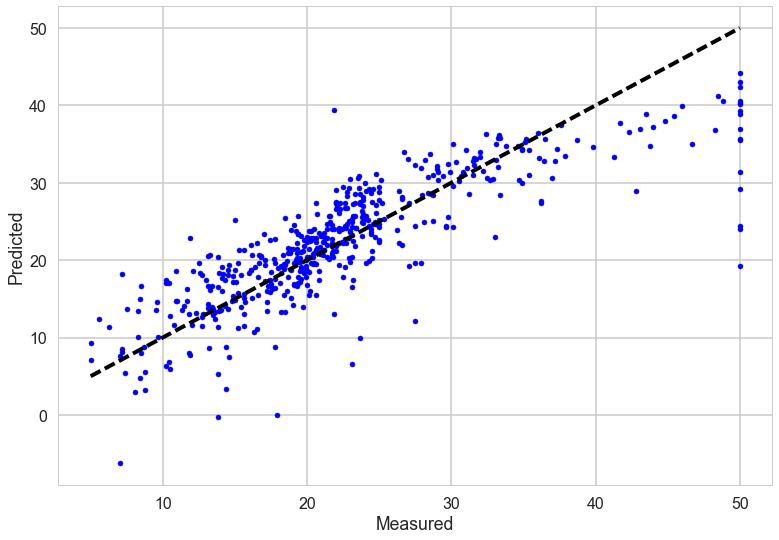

In [82]:
from sklearn.model_selection import cross_val_predict
y = bos.PRICE
predicted = cross_val_predict(lm,x,y,cv=100)
fig, ax = plt.subplots()
ax.scatter(y, predicted,s=25,c='b')
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [87]:
print("Mean standard error: ",np.mean((bos.PRICE - predicted)**2))

Mean standard error:  25.77170551134386


In [88]:
faithful = sm.datasets.get_rdataset("faithful")

In [89]:
faithful.title

'Old Faithful Geyser Data'

In [92]:
faithful = faithful.data
faithful.head()

eruptions  waiting
0      3.600       79
1      1.800       54
2      3.333       74
3      2.283       62
4      4.533       85

In [93]:
faithful.shape

(272, 2)

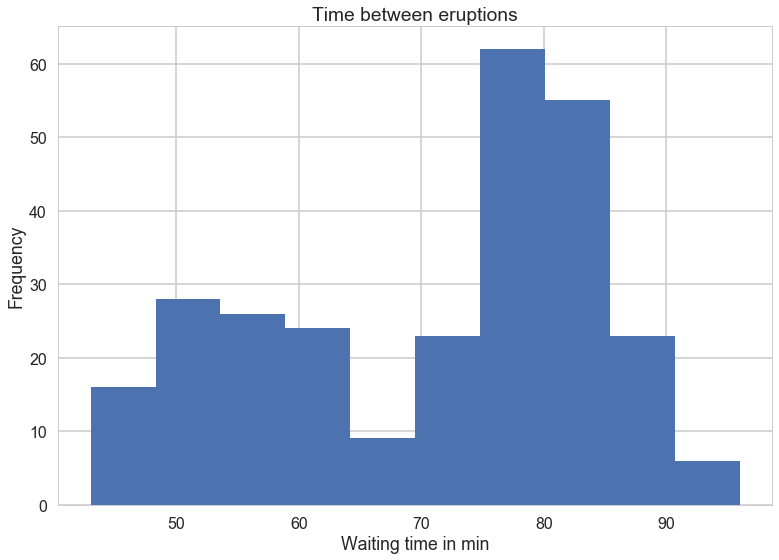

In [94]:
plt.hist(faithful.waiting)
plt.xlabel("Waiting time in min")
plt.ylabel("Frequency")
plt.title("Time between eruptions")

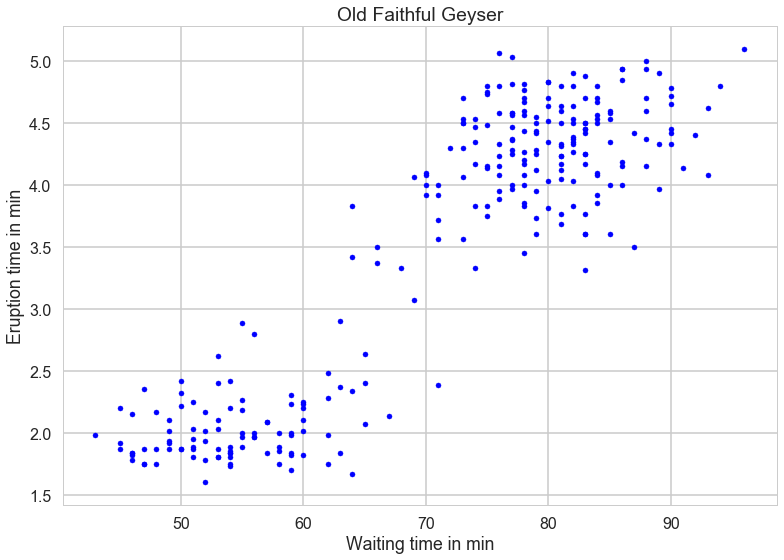

In [96]:
plt.scatter(faithful.waiting, faithful.eruptions,s=25,c='b')
plt.xlabel("Waiting time in min")
plt.ylabel("Eruption time in min")
plt.title("Old Faithful Geyser")

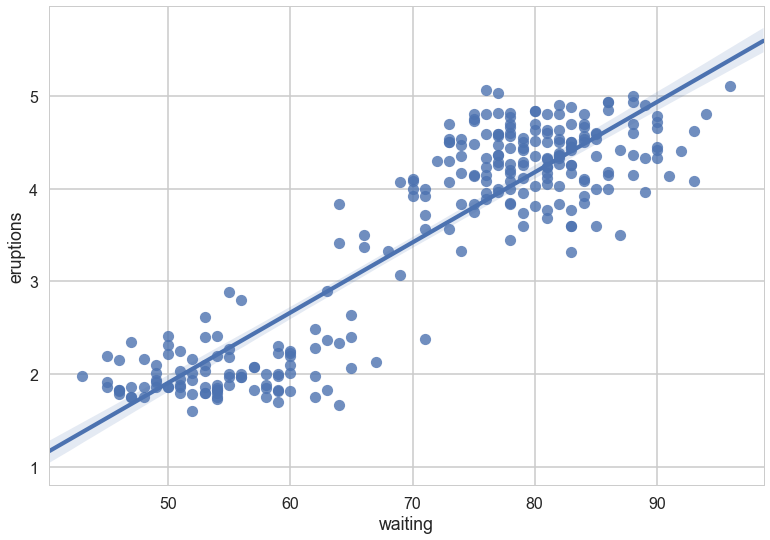

In [97]:
sns.regplot(faithful.waiting,faithful.eruptions,data=faithful,fit_reg=True)

### Build a linear regression to predict eruption time using `statsmodels`
***

Now let's build a linear regression model for the `faithful` DataFrame, and estimate the next eruption duration if the waiting time since the last eruption has been 75 minutes.

$$ Eruptions = \beta_0 + \beta_1 * Waiting + \epsilon $$ 

In [108]:
X = faithful.waiting
y = faithful.eruptions
model = sm.OLS(y,X)

In [109]:
results = model.fit()

In [110]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     9621.
Date:                Mon, 01 May 2017   Prob (F-statistic):          9.97e-214
Time:                        22:47:53   Log-Likelihood:                -250.30
No. Observations:                 272   AIC:                             502.6
Df Residuals:                     271   BIC:                             506.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
waiting        0.0501      0.001     98.086      0.0

In [111]:
print(results.params)
results.params.values

waiting    0.050129
dtype: float64


array([ 0.05012919])

In [112]:
X = sm.add_constant(X)
X.head()

const  waiting
0      1       79
1      1       54
2      1       74
3      1       62
4      1       85

In [117]:
modelW0 = sm.OLS(y,X)
resultsW0 = modelW0.fit()
print(resultsW0.summary())
print(resultsW0.params)

                            OLS Regression Results                            
Dep. Variable:              eruptions   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Mon, 01 May 2017   Prob (F-statistic):          8.13e-100
Time:                        22:51:24   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.8740      0.160    -11.702      0.0

In [118]:
newX = np.array([1,75])
resultsW0.params[0]*newX[0] + resultsW0.params[1] * newX[1]

3.7980801099789669

In [119]:
resultsW0.predict(newX)

array([ 3.79808011])

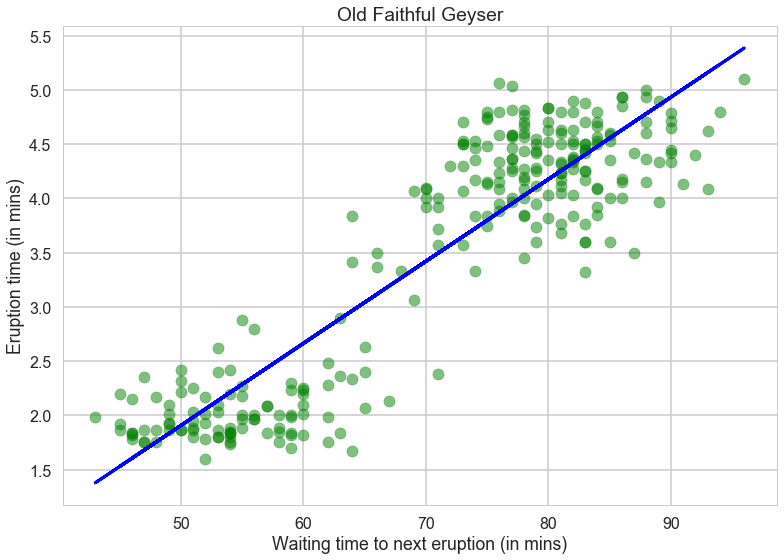

In [122]:
plt.scatter(faithful.waiting, faithful.eruptions,c='g',alpha=0.5)
plt.xlabel('Waiting time to next eruption (in mins)')
plt.ylabel('Eruption time (in mins)')
plt.title('Old Faithful Geyser')

plt.plot(faithful.waiting, resultsW0.fittedvalues, color='blue', linewidth=3)
plt.show()

In [125]:
resids = faithful.eruptions - resultsW0.predict(X)

In [126]:
resids = resultsW0.resid

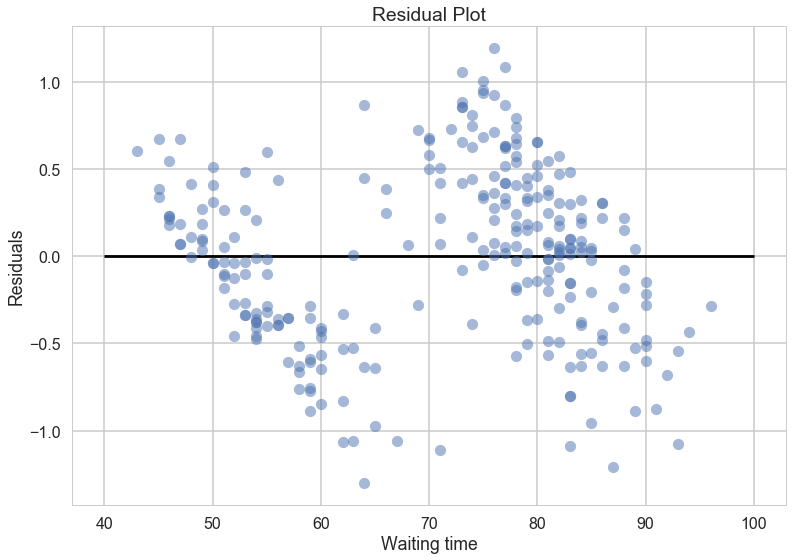

In [128]:
plt.plot(faithful.waiting, resids, 'o',alpha=0.5)
plt.hlines(y = 0, xmin=40, xmax = 100)
plt.xlabel('Waiting time')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [129]:
print("Residual sum of squares: ",np.sum((faithful.eruptions - resultsW0.predict(X))**2))
print("Mean squared error: ",np.mean((faithful.eruptions - resultsW0.predict(x))**2))

Residual sum of squares:  66.56177571269986
Mean squared error:  0.24471241070845534


## Build a linear regression to predict eruption time using least squares 
***

Now let's build a linear regression model for the `faithful` DataFrame, but instead of using `statmodels` (or `sklearn`), let's use the least squares estimates of the coefficients for the linear regression model.

$$ \hat{\beta} = (X^{\top}X)^{-1} X^{\top}Y $$ 

The `numpy` function [`np.dot`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot) is the dot product (or inner product) of two vectors (or arrays in python).  

The `numpy` function [`np.linalg.inv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) can be used to compute the inverse of a matrix. 

In [130]:
X = sm.add_constant(faithful.waiting)
y = faithful.eruptions
np.dot(X.T, X)
np.linalg.inv(np.dot(X.T, X))
beta = np.linalg.inv(np.dot(X.T, X)).dot(X.T).dot(y)
print ("Directly estimating beta:", beta)
print ("Estimating beta using statmodels: ", resultsW0.params.values)


Directly estimating beta: [-1.87401599  0.07562795]
Estimating beta using statmodels:  [-1.87401599  0.07562795]


In [131]:
data = np.array([[float(j) for j in e.strip().split()] 
                 for e in open(r"C:\Users\Zishi\Downloads\2015lab4-master\data\chall.txt")])
data

array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

In [135]:
import statsmodels.api as sm
from statsmodels.formula.api import logit,glm,ols
dat = pd.DataFrame(data,columns = ['Temperature','Failure'])
logit_model = logit('Failure ~ Temperature', dat).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.441635
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Failure   No. Observations:                   23
Model:                          Logit   Df Residuals:                       21
Method:                           MLE   Df Model:                            1
Date:                Tue, 02 May 2017   Pseudo R-squ.:                  0.2813
Time:                        22:22:45   Log-Likelihood:                -10.158
converged:                       True   LL-Null:                       -14.134
                                        LLR p-value:                  0.004804
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
Intercept      15.0429      7.379      2.039      0.041         0.581    29.505
Temperature    -0.2322    

In [136]:
# calculate predicted failure probabilities for new termperatures
x = np.linspace(50, 85, 1000)
p = logit_model.params
eta = p['Intercept'] + x*p['Temperature']
y = np.exp(eta)/(1+np.exp(eta))

(-0.1, 1.1)

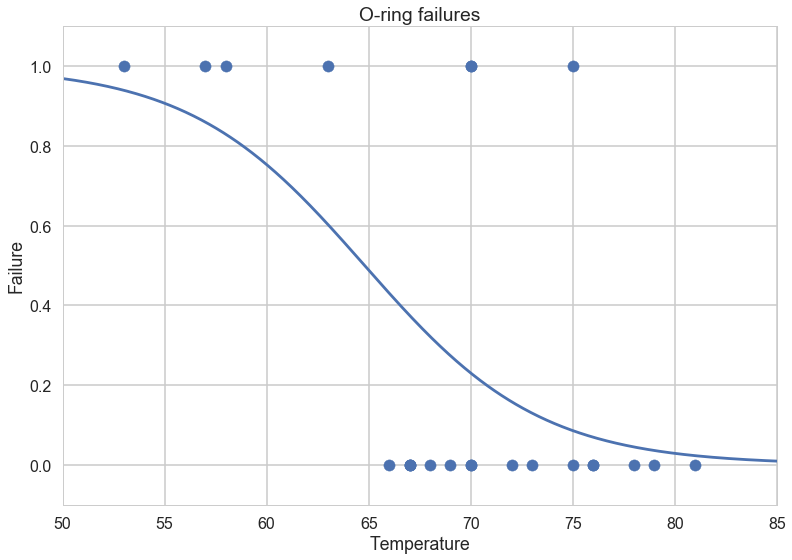

In [137]:
temps, pfail = data[:,0], data[:,1]
plt.scatter(temps,pfail)
axes = plt.gca()
plt.xlabel('Temperature')
plt.ylabel('Failure')
plt.title('O-ring failures')

plt.plot(x, y)

plt.xlim(50, 85)
plt.ylim(-0.1, 1.1)